### Apriori algorithm 2023

In [1]:
# Import thư viện
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
file_path = 'D:/TTTN/CODE/Data Fixed/data.csv'
df = pd.read_csv(file_path)

In [4]:
# Đổi định dạng cột "Date Created"
df['Date Created'] = pd.to_datetime(df['Date Created'])

# Chọn các cột cần thiết
df_basket = df[['Date Created', 'Transaction Code', 'Short Item Code']]

In [7]:
# Lọc dữ liệu theo năm
df_23 = df_basket[((df_basket['Date Created'].dt.year == 2023) & (df_basket['Date Created'].dt.month.isin([7, 11, 12])))]

In [8]:
transaction_list = []

for i in df_23['Transaction Code'].unique():
    l = list(set(df_23[df_23['Transaction Code']==i]['Short Item Code']))
    if len(l) > 0:
        transaction_list.append(l)
        
print(len(transaction_list))

2486


In [9]:
transaction_list

[['M0113-P1S000', 'M9107-P1OS00', 'M8310-P1OS00'],
 ['M0229-P1F000'],
 ['V0352-P1S200'],
 ['J1158-P1S300', 'J1159-P1S300'],
 ['J1167-P1S300', 'J1221-P3F200', 'B0114-P1S000'],
 ['J1130-P1S100', 'J1131-P1S100'],
 ['V0351-P1S200'],
 ['J1158-P1S300', 'J1285-P1F200', 'J1130-P1S100', 'J1131-P1S100'],
 ['V0425-P1F200'],
 ['B0114-P1S000'],
 ['M9320-P1OS00',
  'M8327-P1OS00',
  'M8323-P1OS00',
  'M8310-P1OS00',
  'M8109-P1OS00',
  'V0394-P1S100'],
 ['J1158-P1S300'],
 ['V0425-P1F200', 'M9107-P1OS00'],
 ['J1158-P1S300'],
 ['M7325-P1OS00'],
 ['C0001-P1S300', 'C0002-P1S300'],
 ['V0453-P1S300'],
 ['V0403-P1S100'],
 ['V0453-P1S300'],
 ['M1004-P1F200', 'M8107-P1OS00'],
 ['J1274-P3F200', 'J1272-P3F200'],
 ['C0007-P1S300', 'C0002-P1S300', 'C0003-P1S300'],
 ['J1277-P1F200'],
 ['J1288-P1S300'],
 ['J1167-P1S300'],
 ['J1275-P3F200'],
 ['J1274-P3F200', 'J1275-P3F200'],
 ['J1310-P1S300', 'J1217-P1F200'],
 ['C0012-P1S300'],
 ['J1181-P1F200'],
 ['V0425-P1F200'],
 ['J1158-P1S300'],
 ['V0425-P1F200'],
 ['V0396-P1

In [10]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
te_basket = pd.DataFrame(te_ary, columns=te.columns_)

te_basket.head()

,B0109-P1S000,B0110-P1S000,B0111-P1S000,B0112-P1S000,B0113-P1S000,B0114-P1S000,B0115-P1F100,B0121-P1F100,B0122-P1F100,B0123-P1F100,...,V0589-P1F300,V0597-P1F300,V0598-P1F300,V0599-P1F300,V0600-P1F300,V6301-P1F300,V6301-P1S200,V9134-P1S200,V9407-P1F200,VHQ01-P1S100
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Support và confidence values
support_levels = [0.03, 0.02, 0.01, 0.005]
confidence_levels = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Empty lists
rules_sup3 = []
rules_sup2 = []
rules_sup1 = []
rules_sup05 = []

# # Apriori algorithm with a support level of 3%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[0], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup3.append(len(rules))

# Apriori algorithm with a support level of 2%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[1], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup2.append(len(rules))

# Apriori algorithm with a support level of 1%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[2], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup1.append(len(rules))

# Apriori algorithm with a support level of 0.5%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[3], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup05.append(len(rules))

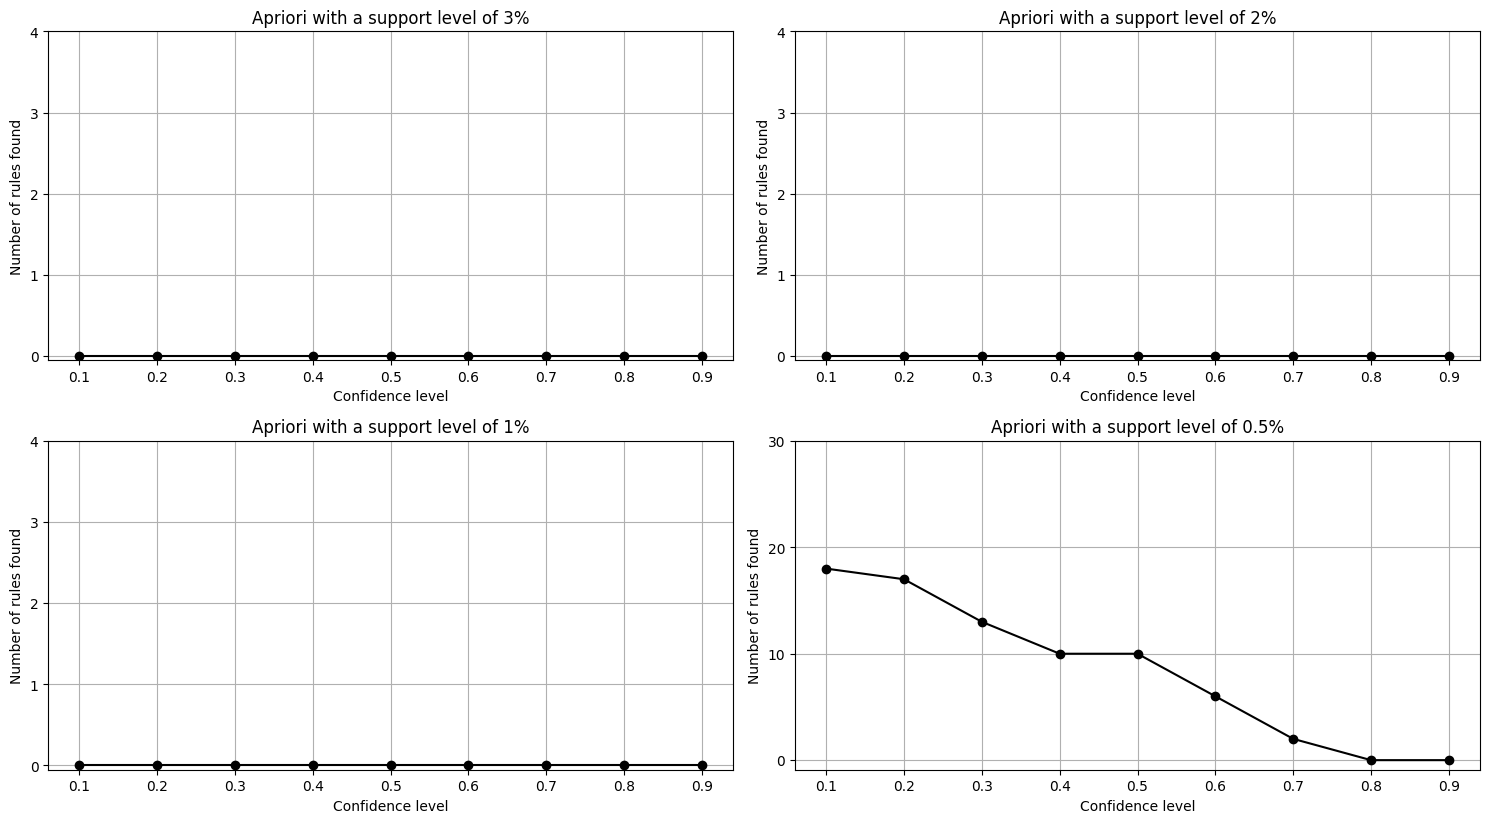

In [12]:
# Set a larger figure size
plt.figure(figsize=(15, 12))

# # Number of rules found with a support level of 3%
plt.subplot(3, 2, 1)
plt.plot(confidence_levels, rules_sup3, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 3%')
plt.yticks(np.arange(0, 5, 1))
plt.grid(True)
plt.gca().set_axisbelow(True)

# Number of rules found with a support level of 2%
plt.subplot(3, 2, 2)
plt.plot(confidence_levels, rules_sup2, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 2%')
plt.yticks(np.arange(0, 5, 1))
plt.grid(True)
plt.gca().set_axisbelow(True)

# Number of rules found with a support level of 1%
plt.subplot(3, 2, 3)
plt.plot(confidence_levels, rules_sup1, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 1%')
plt.yticks(np.arange(0, 5, 1))
plt.grid(True)
plt.gca().set_axisbelow(True)

# Number of rules found with a support level of 0.5%
plt.subplot(3, 2, 4)
plt.plot(confidence_levels, rules_sup05, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 0.5%')
plt.yticks(np.arange(0, 40, 10))
plt.grid(True)
plt.gca().set_axisbelow(True)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

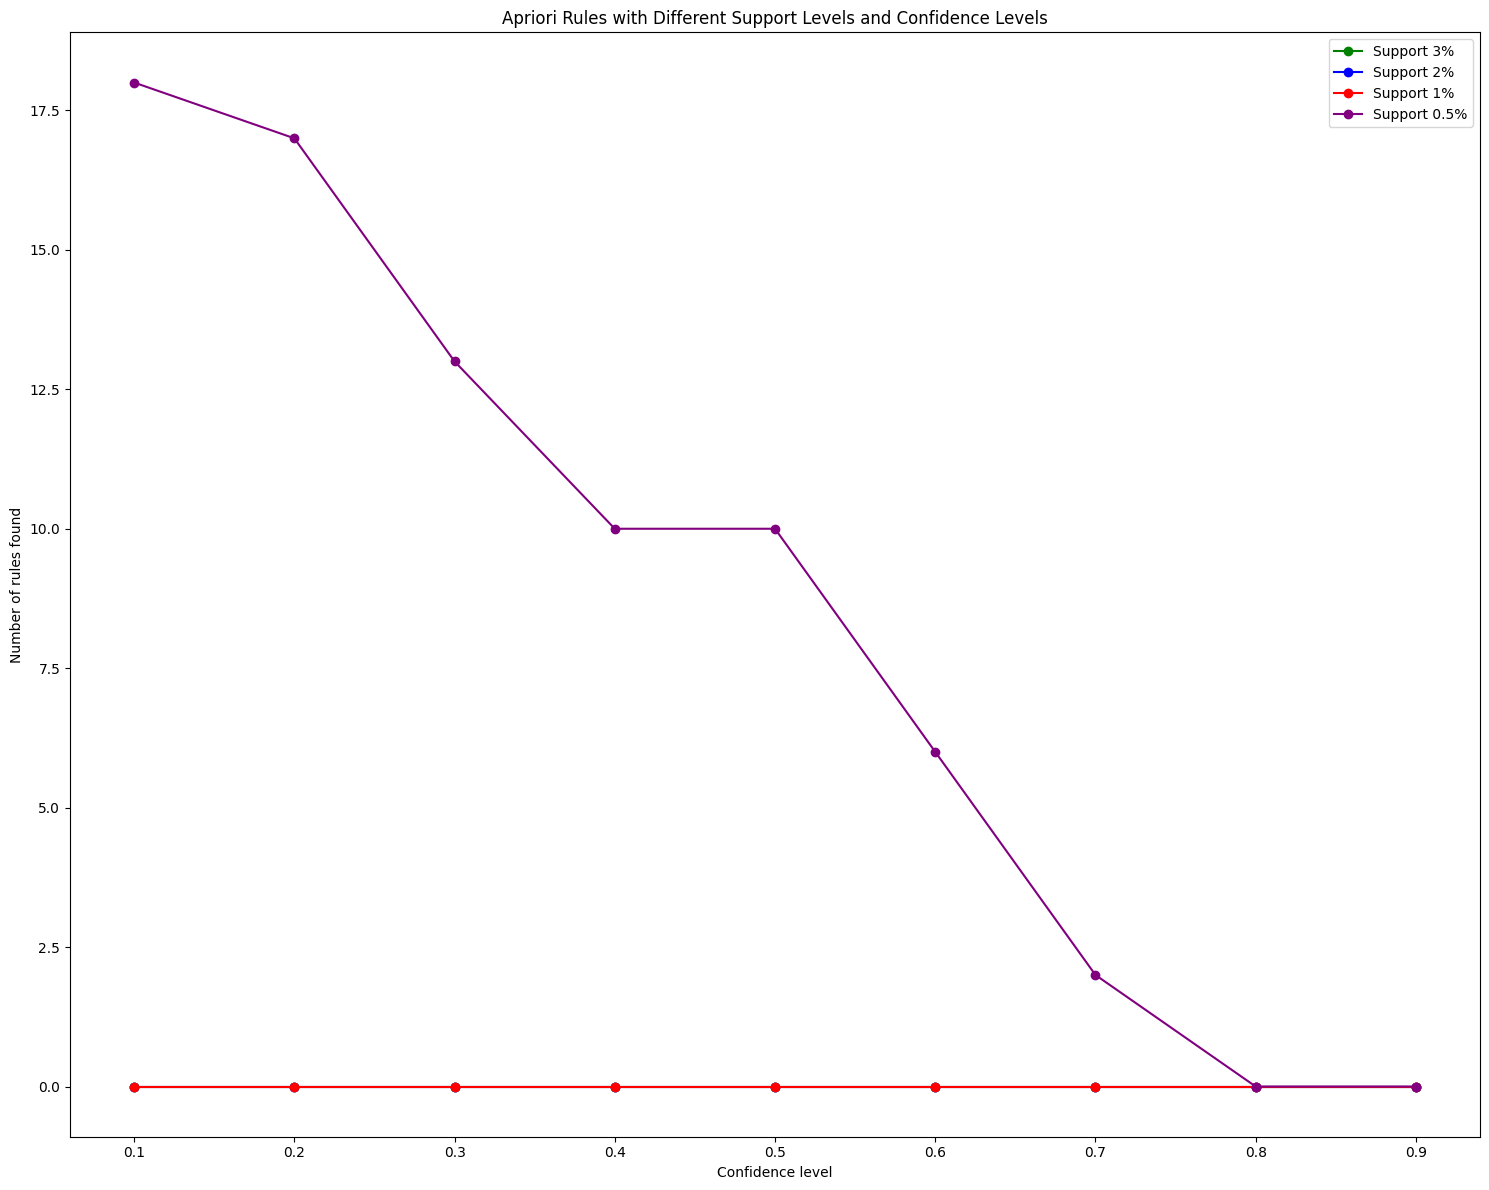

In [13]:
# Set a larger figure size
plt.figure(figsize=(15, 12))

# Plot all lines on the same graph
plt.plot(confidence_levels, rules_sup3, marker='o', linestyle='-', color='g', label='Support 3%')
plt.plot(confidence_levels, rules_sup2, marker='o', linestyle='-', color='b', label='Support 2%')
plt.plot(confidence_levels, rules_sup1, marker='o', linestyle='-', color='r', label='Support 1%')
plt.plot(confidence_levels, rules_sup05, marker='o', linestyle='-', color='purple', label='Support 0.5%')

# Set labels and title
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori Rules with Different Support Levels and Confidence Levels')

# Add legend
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [14]:
frequent_itemsets = apriori(te_basket, min_support=support_levels[3], use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_levels[4])

In [15]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B8116-P1OS00),(B8118-P1OS00),0.008447,0.010459,0.005632,0.666667,63.743590,0.005543,2.968624,0.992698
1,(B8118-P1OS00),(B8116-P1OS00),0.010459,0.008447,0.005632,0.538462,63.743590,0.005543,2.148364,0.994715
2,(C0013-P1S300),(C0014-P1S300),0.011263,0.009654,0.006436,0.571429,59.190476,0.006327,2.310807,0.994304
3,(C0014-P1S300),(C0013-P1S300),0.009654,0.011263,0.006436,0.666667,59.190476,0.006327,2.966211,0.992689
4,(J0011-P1F300),(J1277-P1F300),0.015286,0.037007,0.008447,0.552632,14.933066,0.007882,2.152572,0.947518
5,(J1278-P1F300),(J1277-P1F300),0.007241,0.037007,0.005229,0.722222,19.515700,0.004961,3.466774,0.955679
6,(M1013-P1S301),(M1012-P1S301),0.009654,0.025342,0.006034,0.625000,24.662698,0.005789,2.599088,0.968806
7,(V0561-P1F300),(V0505-P1F300),0.010459,0.007643,0.006034,0.576923,75.485830,0.005954,2.345572,0.997182
8,(V0505-P1F300),(V0561-P1F300),0.007643,0.010459,0.006034,0.789474,75.485830,0.005954,4.700322,0.994352
9,(V0539-P1S300),(V0540-P1S300),0.009252,0.021319,0.005632,0.608696,28.551272,0.005434,2.501073,0.973986


In [16]:
frequent_itemsets

,support,itemsets
0,0.007241,(B0109-P1S000)
1,0.005229,(B0112-P1S000)
2,0.011665,(B0113-P1S000)
3,0.006838,(B0114-P1S000)
4,0.021319,(B0143-P1F300)
...,...,...
180,0.006034,"(M1013-P1S301, M1012-P1S301)"
181,0.006436,"(V0394-P1S100, V0404-P1S100)"
182,0.006034,"(V0561-P1F300, V0505-P1F300)"
183,0.005229,"(V0526-P1F300, V0527-P1F300)"


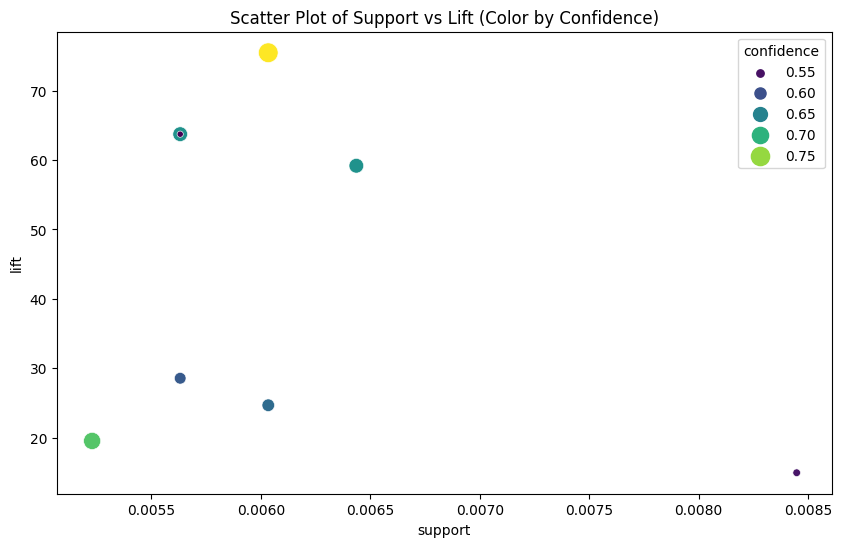

In [17]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='lift', data=rules, hue='confidence', palette='viridis', size='confidence', sizes=(20, 200))
plt.title('Scatter Plot of Support vs Lift (Color by Confidence)')
plt.xlabel('support')
plt.ylabel('lift')
plt.show()